In [41]:
import requests
from PIL import Image
url = 'http://127.0.0.1:5000/'
r = requests.post(url, files={'image': open('20230217_155948.jpg', 'rb')})
import numpy as np

# import scipy.misc
# # scipy.misc.imsave('t2.jpg', np.array(r.json()['result']))
# scipy.misc.toimage(np.array(r.json()['result']), cmin=0.0, cmax=...).save('t2.jpg')
import matplotlib.image

matplotlib.image.imsave('t2.jpg', np.array(r.json()['result'])/255)


In [40]:
np.array(r.json()['result'])/255

array([[[    0.14902,     0.12157,    0.090196],
        [    0.14902,     0.12157,    0.090196],
        [    0.15686,     0.12941,    0.098039],
        ...,
        [    0.32941,     0.28235,     0.21961],
        [    0.32549,     0.27843,     0.21569],
        [    0.32157,     0.27451,     0.21176]],

       [[    0.14902,     0.12157,    0.090196],
        [    0.14902,     0.12157,    0.090196],
        [    0.15294,     0.12549,    0.094118],
        ...,
        [    0.32157,     0.27451,     0.21176],
        [    0.32941,     0.28235,     0.21961],
        [    0.32941,     0.28235,     0.21961]],

       [[    0.14902,     0.12157,    0.090196],
        [    0.15294,     0.12549,    0.094118],
        [    0.14902,     0.12157,    0.090196],
        ...,
        [    0.32549,     0.27843,     0.21569],
        [    0.33725,      0.2902,     0.22745],
        [    0.34118,     0.29412,     0.23137]],

       ...,

       [[    0.29804,     0.30588,     0.29412],
        [  

In [31]:
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
from email.mime.image import MIMEImage

# Define these once; use them twice!
strFrom = 'sanket4461@gmail.com'
strTo = 'magodiasanket@gmail.com'

# Create the root message and fill in the from, to, and subject headers
msgRoot = MIMEMultipart('related')
msgRoot['Subject'] = 'test message'
msgRoot['From'] = strFrom
msgRoot['To'] = strTo
msgRoot.preamble = 'This is a multi-part message in MIME format.'

# Encapsulate the plain and HTML versions of the message body in an
# 'alternative' part, so message agents can decide which they want to display.
msgAlternative = MIMEMultipart('alternative')
msgRoot.attach(msgAlternative)

msgText = MIMEText('This is the alternative plain text message.')
msgAlternative.attach(msgText)

# We reference the image in the IMG SRC attribute by the ID we give it below
msgText = MIMEText('<b>Some <i>HTML</i> text</b> and an image.<br><img src="cid:image1"><br>Nifty!', 'html')
msgAlternative.attach(msgText)

# This example assumes the image is in the current directory
fp = open('t2.jpg', 'rb')
msgImage = MIMEImage(fp.read())
fp.close()

# Define the image's ID as referenced above
msgImage.add_header('Content-ID', '<image1>')
msgRoot.attach(msgImage)

# Send the email (this example assumes SMTP authentication is required)
import smtplib
# smtp = smtplib.SMTP()
# smtp.connect('smtp.gmail.com')
# smtp.login(strFrom, "kyfnzgnexcrusczr")
# smtp.sendmail(strFrom, strTo, msgRoot.as_string())
# smtp.quit()
with smtplib.SMTP_SSL('smtp.gmail.com', 465, context=context) as smtp:
    smtp.login(strFrom, "kyfnzgnexcrusczr")
    smtp.sendmail(strFrom, strTo, msgRoot.as_string())

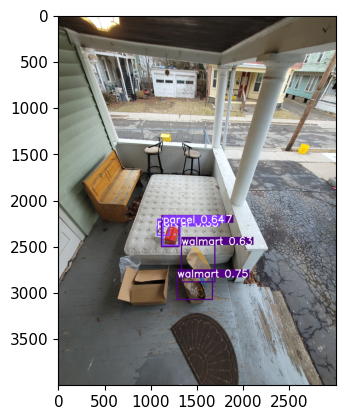

In [34]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.imshow(np.array(r.json()['result']))

In [2]:
import torch
import numpy as np


model = torch.hub.load('ultralytics/yolov5', 'custom', path='./best.pt', force_reload=True)

h:\independent\temp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\magod/.cache\torch\hub\master.zip
YOLOv5  2023-4-2 Python-3.7.0 torch-1.13.1+cpu CPU

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [7]:
import cv2
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame) 
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

: 

In [11]:
res = model('20230217_155948.jpg')

In [18]:
list(set(res.pandas().xyxy[0].name.tolist()))

['walmart', 'parcel']